In [1]:
import numpy as np

from poliastro.bodies import Earth, Sun
from poliastro.constants import J2000
from poliastro.examples import churi, iss, molniya
from poliastro.plotting import OrbitPlotter3D
from poliastro.twobody import Orbit

In [2]:
# More info: https://plotly.com/python/renderers/
import plotly.io as pio

pio.renderers.default = "plotly_mimetype+notebook_connected"

In [3]:
molniya, iss

(6650 x 46550 km x 63.4 deg (GCRS) orbit around Earth (♁) at epoch J2000.000 (TT),
 6772 x 6790 km x 51.6 deg (GCRS) orbit around Earth (♁) at epoch 2013-03-18 12:00:00.000 (UTC))

In [4]:
frame = OrbitPlotter3D()

frame.plot(molniya)

In [5]:
from parse_coords_file import parse_coords_file
from astropy.time import Time
import astropy.units as u
from astropy.coordinates import CartesianRepresentation
from poliastro.util import time_range
from poliastro.ephem import Ephem
from poliastro.frames import Planes
from datetime import datetime
from numpy import datetime64

In [6]:

faulty_orb_csv_path = "/workspaces/ma-max-wendler/examples/space_veins/csv/vectors/satmod_csv/iridiumNEXT-sgp4_SatelliteExampleScenario.leo.vehicleStatistics_itrf_sorted_leoIRIDIUM[149].csv"
start_time_str = "2023-10-22-21-39-19"
start_time = Time(datetime64(datetime.strptime(start_time_str, "%Y-%m-%d-%H-%M-%S")), format="datetime64", scale="utc")
coordinates, start_second = parse_coords_file(faulty_orb_csv_path, format="csv")
xs = [c[0] for c in coordinates]
ys = [c[1] for c in coordinates]
zs = [c[2] for c in coordinates]
cartesian_coordinates = CartesianRepresentation(x=xs, y=ys, z=zs, unit=u.km)
start_coord_1 = cartesian_coordinates[0].flatten()
epochs = time_range(start_time, periods=len(coordinates),spacing=(1 << u.s))
ephem1 = Ephem(cartesian_coordinates, epochs, Planes.EARTH_EQUATOR) 
frame.set_attractor(Earth)
ephem1

Ephemerides at 10806 epochs from 2023-10-22T21:39:19.000000000 (UTC) to 2023-10-23T00:39:24.000000000 (UTC)

In [7]:
coordinates = parse_coords_file("/workspaces/ma-max-wendler/examples/space_veins/traces_itrs/iridiumNEXT_2023-10-22-21-39-19/IRIDIUM 149.trace",
                                format="trace")
xs = [c[0] for c in coordinates]
ys = [c[1] for c in coordinates]
zs = [c[2] for c in coordinates]
cartesian_coordinates = CartesianRepresentation(x=xs, y=ys, z=zs, unit=u.km)
start_coord_2 = cartesian_coordinates[0].flatten()
ephem2 = Ephem(cartesian_coordinates, epochs, Planes.EARTH_EQUATOR) 
print(len(cartesian_coordinates))

10820


In [8]:
print(len(ephem1.epochs))
print(len(ephem2.epochs))

10806
10806


In [9]:
frame = OrbitPlotter3D()
frame.set_attractor(Earth)
# frame.plot_ephem(ephem1, label="IRIDIUM[149]-itrf-sgp4", color="green")
# frame.plot_ephem(ephem2, label="IRIDIUM[149]-itrf-kepler", color="red")
frame._plot_coordinates(start_coord_1, label="sgp4 start", colors=["yellow"], dashed=False)
frame._plot_coordinates(start_coord_2, label="kepler start", colors=["yellow"], dashed=False)
frame.show()

In [10]:
%matplotlib inline
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

In [42]:
coordinates = parse_coords_file("/workspaces/ma-max-wendler/examples/space_veins/traces_itrs/iridiumNEXT_2023-10-22-21-39-19/IRIDIUM 149.trace",
                                format="trace")
xs = [c[0] for c in coordinates]
ys = [c[1] for c in coordinates]
zs = [c[2] for c in coordinates]
# cartesian_coordinates = CartesianRepresentation(x=xs, y=ys, z=zs, unit=u.km)
start_coord_2 = cartesian_coordinates[0].flatten()
# ephem2 = Ephem(cartesian_coordinates, epochs, Planes.EARTH_EQUATOR) 
# print(len(cartesian_coordinates))

In [43]:
csv_path="/workspaces/ma-max-wendler/examples/space_veins/csv/vectors/satmod_csv/iridiumNEXT-sgp4_SatelliteExampleScenario.leo.vehicleStatistics_itrf_sorted_leoIRIDIUM[115].csv"
coordinates, start_second = parse_coords_file(faulty_orb_csv_path, format="csv")
xs_115 = [c[0] for c in coordinates]
ys_115 = [c[1] for c in coordinates]
zs_115 = [c[2] for c in coordinates]
start_coord_115 = cartesian_coordinates[0].flatten()

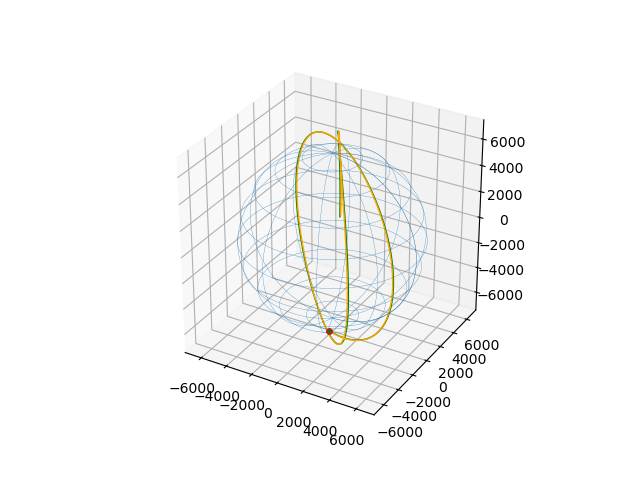

In [46]:
from  matplotlib import cm
%matplotlib widget
plt.ion()
fig = plt.figure()
ax = plt.axes(projection='3d')


u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 6371 * np.outer(np.cos(u), np.sin(v))
y = 6371 * np.outer(np.sin(u), np.sin(v))
z = 6371 * np.outer(np.ones(np.size(u)), np.cos(v))

#ax.plot_surface(x, y, z, cmap=cm.gray)
ax.plot_wireframe(x, y, z, rstride=10, cstride=10, linewidth=0.2)

xs = np.array(xs)
ys = np.array(ys)
zs = np.array(zs)
ax.plot3D(xs, ys, zs, 'green', linewidth=1)
ax.plot3D(np.array(xs_115), np.array(ys_115), np.array(zs_115), 'orange', linewidth=1)
#ax.plot3D(np.array(start_coord_2.x), np.array(start_coord_2.y), np.array(start_coord_2.z), 'red', linewidth=3)
ax.plot(start_coord_2.x,start_coord_2.y ,start_coord_2.z, marker="o", markersize=4, markeredgecolor="red", markerfacecolor="green")

ax.set_aspect('equal')

plt.show()


In [37]:
plt.close()